# Runge Kutta Method

We will show with the example of an oscillator why the Euler method is not sufficient and how the Runge-Kutta method works.

## The Euler Method

Suppose we want to find $y(t)$ where $y$ could be a scalar or a vector. It could also be a phase space vector $y(t)=[x(t),v(t)]$. We denote its derivative with respect to time as $g(y,t)$ i.e.
$$
\dot y = g(y,t)
$$

Note this covers simple cases of classical mechanics where $y(t)=[x(t),v(t)]$ and $g(y,t)=[v(t),F(x,t)/m]$ where $F$ is the force and $m$ is the mass of the particle.

Now the Euler method simply states that the increment in $y$ is given by $g \Delta t$

$$
y(t+ \Delta t) = y(t)+g(y,t) \Delta t + \mathcal O({\Delta t}^2)
$$

and as we will show below this leads to inaccuracies in oscillatory problems.

## The Runge-Kutta Method

The Runge-Kutta method improves the increment to a higher order without actually having to know the second derivative. We discuss the simplest Runge-Kutta here that gives an accurary of $\mathcal O({\Delta t}^2)$ and note higher generalizations are possible.

The change in $g$ itself is
$$
g(t+\Delta t) = g(t)+ \dot g \Delta t = g + (g_t + g_y g) \Delta t
$$
and therefore the second order correction to the increment in $y$ is
$$
\newcommand{\f}[2]{\frac{#1}{#2}}
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\begin{eqnarray}
y(t+ \Delta t) &=& y(t) +  \f{g + g + (g_t + g_y g) \Delta t}{2}\Delta t +\mathcal O({\Delta t}^3) \\
&=& y(t) + g \Delta t  + \f{1}{2} (g_t + g g_y) (\Delta t)^2+\mathcal O({\Delta t}^3)
\end{eqnarray}
$$
We could have gotten this by Taylor expansion but I think its useful to see how it comes about.

We want to see if we can write this as
$$
\bea
y(t+ \Delta t) &=& y(t) + \alpha_1 g(y,t) \Delta t + \alpha_2 g( y+ \nu g(y,t) \Delta t,t+ \nu \Delta t) + \mathcal O({\Delta t}^3) \\
&=& y(t) + (\alpha_1 + \alpha_2) g \Delta t + \alpha_2 \nu ( g_t + g g_y) (\Delta t)^2+\mathcal O({\Delta t}^3)
\eea
$$
and thus we see that we can indeed do so if we have
$$
\bea
\alpha_1 + \alpha_2 &=& 1 \\
\alpha_2 \nu=\f{1}{2}
\eea
$$
We make a choice $\nu=1$ giving
$$
y(t+ \Delta t) = y(t) + \f{1}{2} g(y,t)~\Delta t + \f{1}{2} g( y+ g(y,t) \Delta t,t+\Delta t)~\Delta t + \mathcal O({\Delta t}^3)
$$




In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class Trajectory(object):
    
    def __init__(self,x0,v0,T,nsteps,method="euler"):
        self.x0=x0
        self.v0=v0
        self.T=T
        self.nsteps=nsteps
        
        self.dt=1.0*T/nsteps
        
        self.timeline=np.linspace(0,T,nsteps)
        
        self.paths=np.zeros([nsteps,2])
        
        self.paths[0,:]=[x0,v0]
        
        
        
        for i in range(self.nsteps-1):
            if method=="euler":
                self.paths[i+1,:]=self.paths[i,:]+self.euler(self.paths[i,:],self.dt*i)
            else:
                self.paths[i+1,:]=self.paths[i,:]+self.rk2(self.paths[i,:],self.dt*i)
        
    # Virtual function to be overriden by child classes. It takes the state [x,v] and t and returns [dx/dt,dv/dt]
    # The default version corresponds to no force
    def derivative_func(self,state,time):
        x,v=state
        return np.array([v,0])
        
    def getPaths(self):
        return self.paths
      
    def euler(self,state, t):
        # Uses the virtual derivative_func to give Euler method difference to state (i.e. a [x,v] pair)
        return self.dt*self.derivative_func(state,t)
    
    def rk2(self,state, t):
        # Uses a Runge Kutta method using two calls to Euler method succesively to give difference in state
        state_difference_0 = self.euler(state, t)
        state_difference_1 = self.euler(state + state_difference_0, t + self.dt) 
        return 0.5*(state_difference_0+state_difference_1)
        
        
class HarmonicOscillatorGravityTrajectory(Trajectory):
    
    def __init__(self,x0,v0,g,k,m,T,nsteps,method="euler"):
        self.g=g
        self.k=k
        self.m=m
        self.derivative_func=self.Oscillator_Derivative
        super(HarmonicOscillatorGravityTrajectory,self).__init__(x0,v0,T,nsteps,method)
        

        
    def Oscillator_Derivative(self,state,time):
        x,v=state
        xnew=v
        vnew=-self.k/self.m*x- self.g
        return np.array([xnew,vnew])

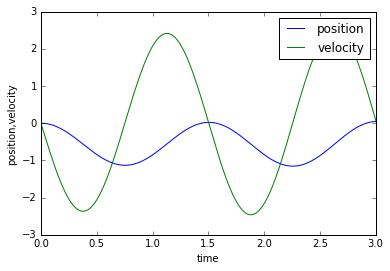

In [17]:
t=HarmonicOscillatorGravityTrajectory(0.,0.,9.8,3.5,.2,3.0,1000)
plt.plot(t.timeline,t.paths[:,0],label="position")
plt.plot(t.timeline,t.paths[:,1],label="velocity")
plt.xlabel('time')
plt.ylabel('position,velocity')
plt.legend()

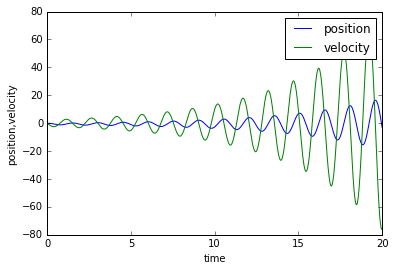

In [18]:
t=HarmonicOscillatorGravityTrajectory(0.,0.,9.8,3.5,.2,20.0,1000)
plt.plot(t.timeline,t.paths[:,0],label="position")
plt.plot(t.timeline,t.paths[:,1],label="velocity")
plt.xlabel('time')
plt.ylabel('position,velocity')
plt.legend()

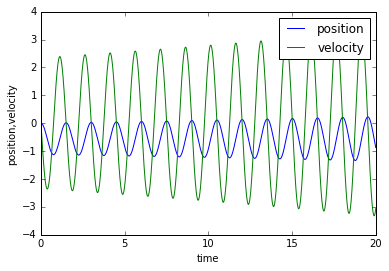

In [19]:
t=HarmonicOscillatorGravityTrajectory(0.,0.,9.8,3.5,.2,20.0,10000)
plt.plot(t.timeline,t.paths[:,0],label="position")
plt.plot(t.timeline,t.paths[:,1],label="velocity")
plt.xlabel('time')
plt.ylabel('position,velocity')
plt.legend()

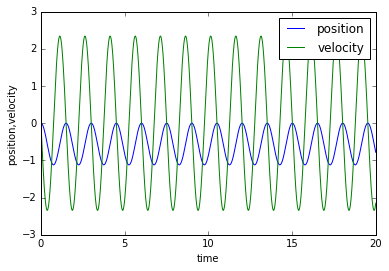

In [20]:
t=HarmonicOscillatorGravityTrajectory(0.,0.,9.8,3.5,.2,20.0,10000,"rk2")
plt.plot(t.timeline,t.paths[:,0],label="position")
plt.plot(t.timeline,t.paths[:,1],label="velocity")
plt.xlabel('time')
plt.ylabel('position,velocity')
plt.legend()